<a href="https://colab.research.google.com/github/VaishnaviKrishnamoorthy/Task-1/blob/main/KNN_Assignment13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Networks_Ads.csv

**Importing the libraries**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions 
from sklearn.model_selection import cross_val_score 

In [ ]:
data=pd.read_csv("/content/Social_Network_Ads.csv")

**Importing the dataset**

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
data['Gender']=data['Gender'].map({'Male':1,'Female':0})

In [ ]:
del data['User ID']

In [ ]:
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [ ]:
x = data[['Gender','Age','EstimatedSalary']].values 
y = data['Purchased'].values 

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

**Feature Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

**Fitting K-NN to the Training set**

In [ ]:
knn=KNeighborsClassifier(2)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

**Predicting the Test set results**

In [ ]:
y_pred=knn.predict(x_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0]


**Making the Confusion Matrix**

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[74  5]
 [10 31]]


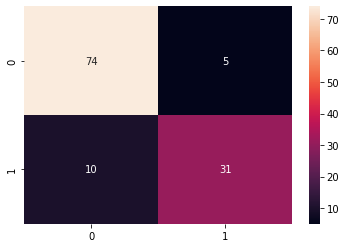

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


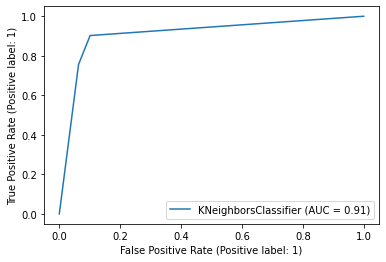

In [ ]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
plot_roc_curve(knn, x_test, y_test)